# Visualize HiPS Catalogs

In [1]:
%matplotlib inline

In [2]:
import vaex
import matplotlib.pyplot as plt
import pandas as pd
import healpy as hp
import numpy as np

Just walk through all the files and plot the results on an Aitoff projection. Note that this will take awhile for a big catalog & CSV.

  0%|          | 0/1278 [00:00<?, ?it/s]

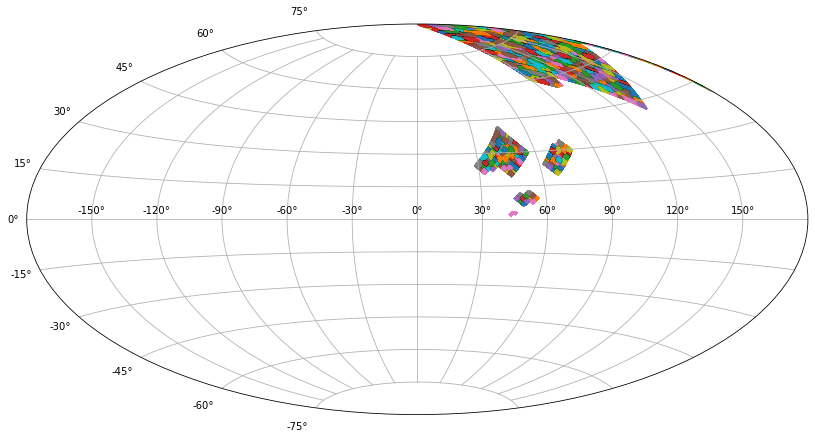

In [51]:
import os, os.path
from tqdm.notebook import tqdm

plt.figure(figsize=(14, 8))
plt.subplot(111, projection='aitoff')
plt.grid(True)

for root, dirs, files in tqdm(list(os.walk("output"))):
    if 'catalog.csv.gz' not in files:
        continue
    fn = os.path.join(root, 'catalog.csv.gz')
    df = pd.read_csv(fn)
    plt.scatter(np.deg2rad(df['ra']), np.deg2rad(df['dec']), s=0.001)


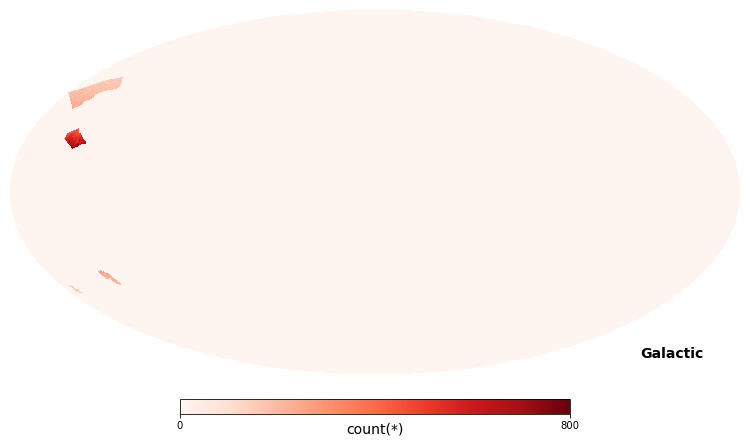

In [25]:
df.viz.healpix_heatmap(healpix_level=8, figsize=(14, 8), colormap='Reds')

ERROR:MainThread:vaex:error opening 'output/Norder5/Npix291/catalog.h5'
Traceback (most recent call last):
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/__init__.py", line 225, in open
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/dataset.py", line 73, in open
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/dataset.py", line 1461, in open
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/hdf5/dataset.py", line 71, in __init__
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/hdf5/dataset.py", line 202, in _load
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/hdf5/dataset.py", line 375, in _load_columns
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/hdf5/dataset.py", line 265, in _map_hdf5_array
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/dataset_mmap.py", line 

Traceback (most recent call last):
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/IPython/core/magics/execution.py", line 1324, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 10, in <module>
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/__init__.py", line 266, in open_many
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/__init__.py", line 225, in open
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/dataset.py", line 73, in open
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/dataset.py", line 1461, in open
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/hdf5/dataset.py", line 71, in __init__
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/hdf5/dataset.py", line 202, in _load
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/hdf5/dataset.py", line 375

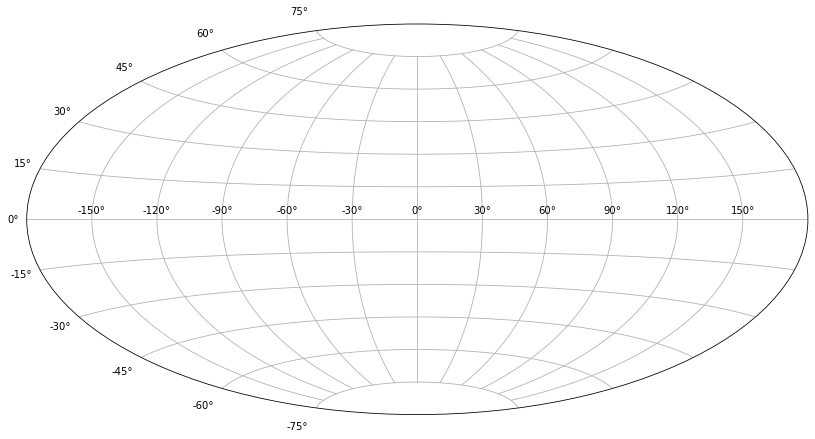

In [ ]:
%%time
import os, os.path

plt.figure(figsize=(14, 8))
plt.subplot(111, projection='aitoff')
plt.grid(True)

catfiles = [
    os.path.join(root, 'catalog.h5') for root, dirs, files in os.walk("output") if 'catalog.h5' in files
]
df = vaex.open_many(catfiles)

df.scatter(np.deg2rad(df['l']), np.deg2rad(df['b']), s=0.001, length_limit=1e10)
#plt.scatter(np.deg2rad(df['l'].values), np.deg2rad(df['b'].values), s=0.001)
plt.title("Gaia GDR2 (Galactic Coordinates)");

  0%|          | 0/2033 [00:00<?, ?it/s]

CPU times: user 2min, sys: 10.9 s, total: 2min 11s
Wall time: 2min 39s


Text(0.5, 1.0, 'Gaia GDR2 (Galactic Coordinates)')

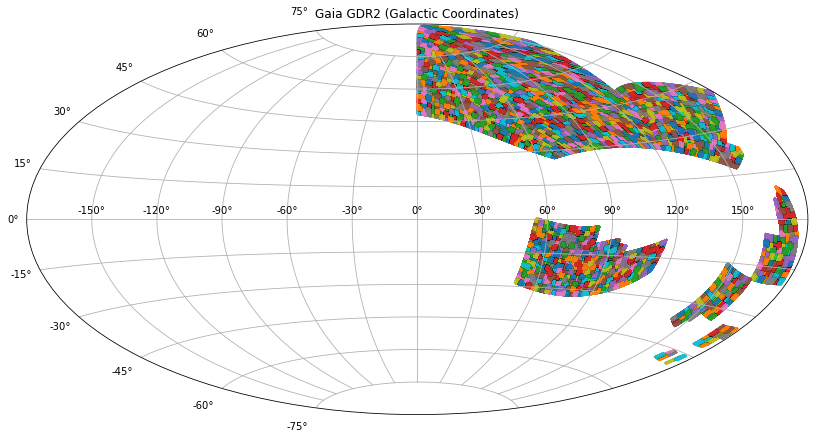

In [5]:
%%time
import os, os.path
from tqdm.notebook import tqdm

plt.figure(figsize=(14, 8))
plt.subplot(111, projection='aitoff')
plt.grid(True)

for root, dirs, files in tqdm(list(os.walk("output"))):
    if 'catalog.h5' not in files:
        continue
    fn = os.path.join(root, 'catalog.h5')
    df = vaex.open(fn)
    plt.scatter(np.deg2rad(df['l'].values), np.deg2rad(df['b'].values), s=0.001)

plt.title("Gaia GDR2 (Galactic Coordinates)");

  0%|          | 0/2033 [00:00<?, ?it/s]

CPU times: user 5min 6s, sys: 1min 6s, total: 6min 13s
Wall time: 6min 54s


Text(0.5, 1.0, 'Gaia GDR2 (Galactic Coordinates)')

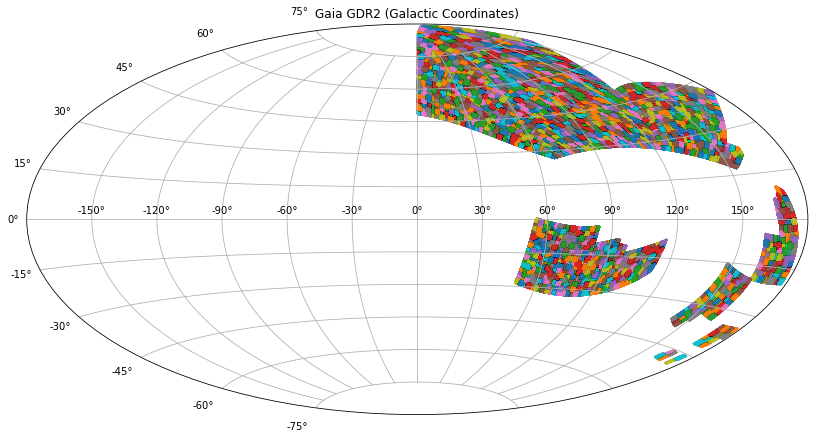

In [66]:
%%time
import os, os.path
from tqdm.notebook import tqdm

plt.figure(figsize=(14, 8))
plt.subplot(111, projection='aitoff')
plt.grid(True)

for root, dirs, files in tqdm(list(os.walk("output"))):
    if 'catalog.h5' not in files:
        continue
    fn = os.path.join(root, 'catalog.h5')
    df = pd.read_hdf(fn)
    plt.scatter(np.deg2rad(df['l']), np.deg2rad(df['b']), s=0.001)

plt.title("Gaia GDR2 (Galactic Coordinates)");

In [1]:
from dask.distributed import Client, progress
client = Client(n_workers=48, threads_per_worker=1, memory_limit='16GB')
client.cluster

In [2]:
import dask
import dask.dataframe as dd
import numpy as np

In [255]:
pdf = pd.DataFrame(dict(key=np.arange(100, dtype=int), value=np.arange(100)/10))

np.random.seed(42)
import glob

! rm data/foo-*.csv data/bar-*.csv
divs = []
for i, d in enumerate(np.array_split(pdf, 4)):
    divs.append(d["key"].iloc[0])

    # keep a random subset
    keep = np.random.choice(d.index.values, size=len(d.index.values)//2, replace=False)
    d = d.loc[keep]

    d.to_csv(f'data/foo-{i:02}.csv', index=False)
divs.append(pdf["key"].iloc[-1])

divs2 = []
for i, d in enumerate(np.array_split(pdf, 8)):
    divs2.append(d["key"].iloc[0])

    # keep a random subset
    keep = np.random.choice(d.index.values, size=len(d.index.values)//2, replace=False)
    d = d.loc[keep]
    
    d.to_csv(f'data/bar-{i:02}.csv', index=False)
divs2.append(pdf["key"].iloc[-1])

# re-read the generated CSVs
pdf = pd.concat(pd.read_csv(fn).set_index('key') for fn in glob.glob('data/foo-*.csv'))
pdf2 = pd.concat(pd.read_csv(fn).set_index('key') for fn in glob.glob('data/bar-*.csv'))

df = dd.read_csv('data/foo-*.csv').set_index('key', sorted=True, divisions=divs)
df2 = dd.read_csv('data/bar-*.csv').set_index('key', sorted=True, divisions=divs2)
divs, divs2

([0, 25, 50, 75, 99], [0, 13, 26, 39, 52, 64, 76, 88, 99])

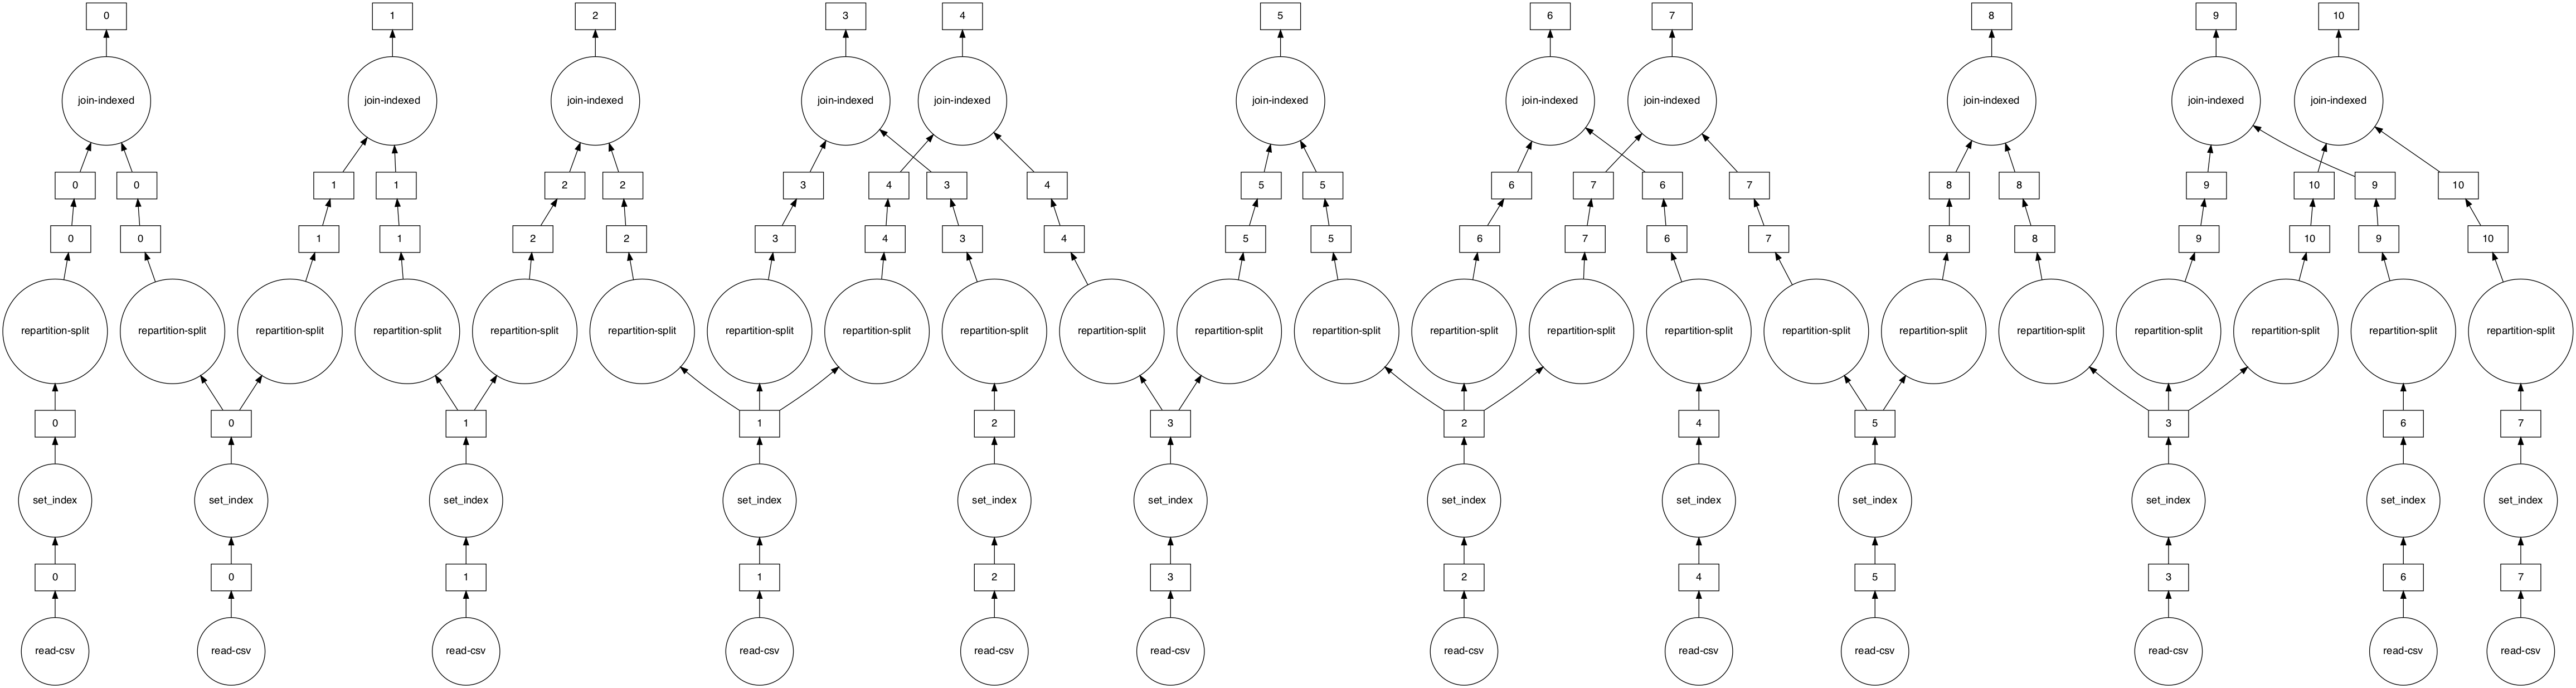

In [267]:
df.merge(df2, left_index=True, right_index=True, how='outer').visualize(optimize_graph=False)

In [254]:
pres = pdf.merge(pdf2, left_index=True, right_index=True, how='outer') # pandas version
res   = df.merge( df2, left_index=True, right_index=True, how='outer').compute() # dask version
assert pres.equals(res) # verify equality
res

,value_x,value_y
key,,
0,0.0,NaN
1,NaN,0.1
2,NaN,0.2
3,NaN,0.3
4,0.4,0.4
...,...,...
93,NaN,9.3
94,NaN,9.4
95,9.5,NaN


In [266]:
futures = client.compute( df.merge( df2, left_index=True, right_index=True, how='outer'), optimize_graph=True )
progress(futures)

VBox()

## Dask Scalability Tests

In [17]:
# rewrite to pandas HDF5 format
import vaex
import dask
import os, os.path
import glob
from tqdm.notebook import tqdm
import pandas as pd
src = glob.glob('output/*/*/catalog.h5')
dest = [ os.path.join(os.path.dirname(fn), 'catalog.parquet') for fn in src ]

@dask.delayed
def convert(fn, destFn):
    df = vaex.open(fn).to_pandas_df()
    df.set_index('hips_pix').sort_index()
    df.to_parquet(destFn)
    return destFn

output = []
for fn, destFn in list(zip(src, dest)):
    fut = convert(fn, destFn)
    output.append(fut)

results = client.compute(output)
progress(*results)

VBox()

## Experiments

In [1]:
from dask.distributed import Client, progress
client = Client(n_workers=48, threads_per_worker=1)
client.cluster

Load the catalog:

In [56]:
df = pd.read_pickle('output/Norder2/Npix76/import.GaiaSource_003112-005263.parquet.pkl')
df[["ra", "dec", "hips_k", "hips_pix"]]

,ra,dec,hips_k,hips_pix
2358,45.654077,11.385906,2,76
2359,45.677741,11.394446,2,76
2360,45.642814,11.394098,2,76
2361,45.658180,11.399627,2,76
2362,45.659404,11.406434,2,76
...,...,...,...,...
238014,53.510729,12.002441,2,76
238015,53.527602,12.015317,2,76
238016,53.530941,12.018892,2,76
238017,53.523905,12.018712,2,76


In [58]:
hp.ang2pix(2**2, df['ra'].values, df['dec'].values, lonlat=True)

array([74, 74, 74, ..., 58, 58, 58])

In [73]:
hp.ang2pix(2**10, df['ra'].values, df['dec'].values, lonlat=True) >> 16

array([76, 76, 76, ..., 76, 76, 76])

3933
Computing
Plotting
CPU times: user 5.84 s, sys: 5.27 s, total: 11.1 s
Wall time: 16.8 s


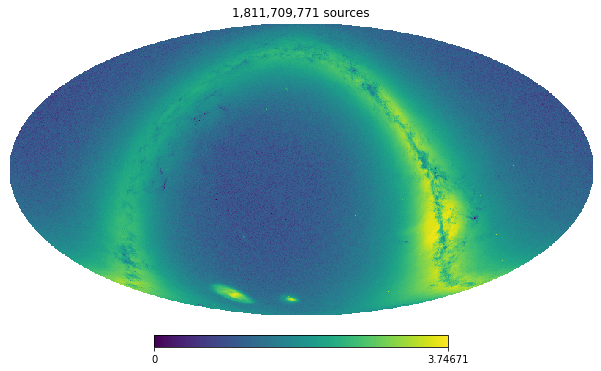

In [79]:
%%time
import dask
from dask import delayed
from dask.distributed import as_completed
import numpy as np
import pandas as pd
import healpy as hp
import dask.bag as db
from tqdm.notebook import tqdm
k=10

import glob
pqfiles = glob.glob('output/*/*/catalog.parquet')

#pqfiles = glob.glob('cache/*.parquet')
print(len(pqfiles))
#pqfiles = pqfiles[:2]

def hpix_hist(parts):
    # histogram the list of parts, and return it
    img = np.zeros(hp.order2npix(k), dtype=np.uint32)
    for fn in parts:
        df = pd.read_parquet(fn, columns=['ra', 'dec'])
#        df = pd.read_pickle(fn)
        hpix = hp.ang2pix(2**k, df['ra'].values, df['dec'].values, lonlat=True, nest=True)
        hpix, ct = np.unique(hpix, return_counts=True)
        img[hpix] += ct.astype(np.uint32)

    return img

print("Computing")
b = db.from_sequence(pqfiles)
img = b.reduction(hpix_hist, sum, split_every=8).compute()

print("Plotting")
hp.mollview(np.log10(img+1), title=f'{img.sum():,.0f} sources', nest=True)

In [39]:
opix

{0: array([], dtype=int64),
 1: array([], dtype=int64),
 2: array([  0,   2,  17,  19,  20,  21,  22,  23,  28,  29,  34,  35,  40,
         41,  42,  43,  44,  46,  64,  65,  66,  67,  68,  69,  70,  71,
         73,  76,  77,  90, 102, 103, 105, 107, 108, 109, 110, 111, 131,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 181]),
 3: array([  4,   5,   6,   7,  12,  13,  14,  15,  16,  18,  24,  32,  33,
         34,  35,  36,  37,  38,  40,  41,  42,  53,  55,  61,  62,  63,
         64,  65,  66,  67,  72,  73,  74,  75,  96,  97,  98,  99, 100,
        101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 120, 121, 122,
        123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 180, 181, 182, 183, 188, 189, 190, 191, 193, 196,
        197, 199, 208, 209, 210, 212, 213, 234, 235, 238, 239, 250, 251,
        252, 253, 254, 255, 288, 289, 290, 291, 296, 297, 298, 299, 30

In [8]:
import pickle
with open("output/hpix10.map.pkl", "wb") as fp:
    pickle.dump(img, fp)

3386
Computing
Plotting
CPU times: user 8min 5s, sys: 8min 55s, total: 17min 1s
Wall time: 30min 34s


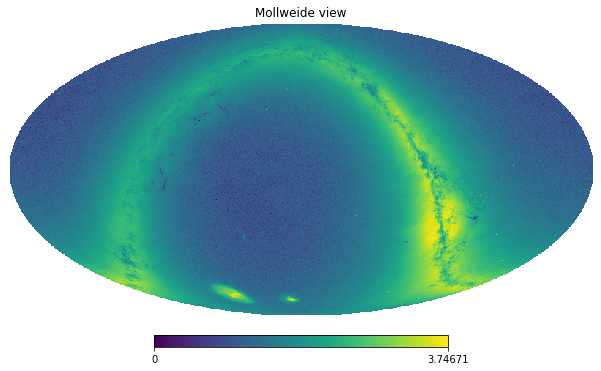

In [295]:
%%time
import dask
from dask import delayed
from dask.distributed import as_completed
import numpy as np
import pandas as pd
import healpy as hp
import dask.bag as db
from tqdm.notebook import tqdm
k=10

import glob
urls = glob.glob('/data2/epyc/data/gaia_edr3_csv/*.csv.gz')
print(len(urls))
#urls = urls[:2]

def hpix_hist(parts):
    # histogram the list of parts, and return it
    img = np.zeros(hp.order2npix(k), dtype=np.uint32)
    for fn in parts:
        #df = pd.read_csv(fn, usecols=['ra', 'dec'])
        
        df = pd.read_csv(fn)
        parqFn = os.path.join('cache', os.path.basename(fn).split('.')[0] + '.parquet')
        df.to_parquet(parqFn) # cache the parquet file for later import

        hpix = hp.ang2pix(2**k, df['ra'].values, df['dec'].values, lonlat=True, nest=True)
        hpix, ct = np.unique(hpix, return_counts=True)
        img[hpix] += ct.astype(np.uint32)

    return img

print("Computing")
b = db.from_sequence(urls)
img = b.reduction(hpix_hist, sum, split_every=8).compute()

print("Plotting")
hp.mollview(np.log10(img+1), nest=True)

Compute the adaptive map by successivelly binning the input pixels.

0 12582912 0
1 12582912 0
2 9306112 50
3 4521984 292
4 1630208 706
5 404480 1197
6 9216 1544
7 0 144
8 0 0
9 0 0
10 0 0
Total partitions: 3933
CPU times: user 1.01 s, sys: 465 ms, total: 1.47 s
Wall time: 1.03 s


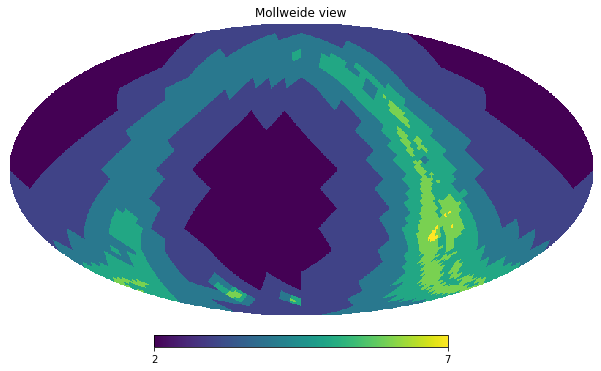

In [12]:
%%time
i = img.copy()
idx = np.arange(len(i))

orders = np.full(len(i), -1)
opix = {}
thresh = 1_000_000

# Top-down partitioning. Given a dataset partitioned at order k
# bin it to higher orders (starting at 0, and working our way
# down to k), and at each order find pixels whose count has
# fallen below the threshold 'thresh' and record them to be
# stored at this order.
#
# Outputs: opix: dict of order => pixel IDs
#          orders: a k-order array storing the order at which this k-order pixel should be stored.
#
# There's a lot of fun numpy/healpix magic down below, but it all boils
# down to two things:
#
# * In healpix NEST indexing scheme, when the order of the pixelization
#   is raised by 1, each pixel is subdivided into four subpixels with
#   pixel IDs [4*idx_o, 4*idx+1, 4*idx+2, 4*idx+3]. That means that if
#   you need to find out in which _higher_ order pixel some pixel ID
#   is, just integer-divide it by 4**(k-o) where k is your current order
#   and o is the higher order. Example: pixel 49 at order 3 fall within
#   pixel 12 at order 2, 3 at order 1, and 0 at order 0. Easy!
# * How do you efficiently bin pixels _values_ to a higher order? To go
#   one order up, you need to sum up groups of 4 pixels in the array
#   (we're "reversing" the subdivision). If we go up by two orders, it's
#   groups of 4*4... generally, it's 4**(k-o). This summing can be done
#   very efficiently with a bit of numpy trickery: reshape the 1-D healpix
#   array to a 2-d array where the 2nd dimension is equal to 4**(k-o),
#   and then simply sum along that axis. The result leaves you with the
#   array rebinned to level o.
#
for o in range(0, k+1):
    # the number of order-k pixels that are in one order-o pixel.
    # integer-dividing order-k pixel index (NEST scheme) with 
    # this value will return the order-o index it falls within.
    k2o = 4**(k-o)

    # order o-sized bool mask listing pixels that haven't yet been
    # assigned a partition.
    active = (orders == -1).reshape(-1, k2o).any(axis=1)

    # rebin the image to order o
    imgo = i.reshape(-1, k2o).sum(axis=1)

    # find order o indices where pixel counts are below threshold.
    # These are the one which we will keep at this order.
    pixo, = np.nonzero(active & (imgo < thresh))
    opix[o] = pixo # store output

    # record the order-k indices which have been assigned to the
    # partition at this level (order o). This makes it easy to
    # check which ones are still left to process (see the 'active=...' line above)
    pixk = idx.reshape(-1, k2o)[pixo].flatten()  # this bit of magic generates all order-k 
                                                 # indices of pixels that fall into order-o
                                                 # pixels stored in pixo
    orders[pixk] = o

    print(o, np.count_nonzero(orders == -1), len(pixo))

assert not (orders == -1).any()

print("Total partitions:", sum(map(len, opix.values())))
hp.mollview(orders, nest=True)

In [13]:
with open("output/orders.hpix10.pkl", "wb") as fp:
    pickle.dump([opix, orders], fp)

Now partition the data according to the computed hierarchy.

In [27]:
opix

{0: array([], dtype=int64),
 1: array([], dtype=int64),
 2: array([  0,   2,  17,  19,  20,  21,  22,  23,  28,  29,  34,  35,  40,
         41,  42,  43,  44,  46,  64,  65,  66,  67,  68,  69,  70,  71,
         73,  76,  77,  90, 102, 103, 105, 107, 108, 109, 110, 111, 131,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 181]),
 3: array([  4,   5,   6,   7,  12,  13,  14,  15,  16,  18,  24,  32,  33,
         34,  35,  36,  37,  38,  40,  41,  42,  53,  55,  61,  62,  63,
         64,  65,  66,  67,  72,  73,  74,  75,  96,  97,  98,  99, 100,
        101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 120, 121, 122,
        123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 180, 181, 182, 183, 188, 189, 190, 191, 193, 196,
        197, 199, 208, 209, 210, 212, 213, 234, 235, 238, 239, 250, 251,
        252, 253, 254, 255, 288, 289, 290, 291, 296, 297, 298, 299, 30

In [31]:
np.nonzero(orders == 6)
orders[3311616]
3311616 >> 2*(10-6)

12936

In [ ]:
%%time
urls = glob.glob('cache/*.parquet')
print(len(urls))
#urls = urls[:2]

def cat_partition(parts):
    # histogram the list of parts, and return it
    img = np.zeros(hp.order2npix(k), dtype=np.uint32)
    for fn in parts:
        df = pd.read_parquet(fn, columns=['ra', 'dec'])

        df = pd.read_csv(fn)
        parqFn = os.path.join('cache', os.path.basename(fn).split('.')[0] + '.parquet')
        df.to_parquet(parqFn) # cache the parquet file for later import

        hpix = hp.ang2pix(2**k, df['ra'].values, df['dec'].values, lonlat=True, nest=True)
        hpix, ct = np.unique(hpix, return_counts=True)
        img[hpix] += ct.astype(np.uint32)

    return img

print("Computing")
b = db.from_sequence(urls)
img = b.reduction(hpix_hist, sum, split_every=8).compute()

print("Plotting")
hp.mollview(np.log10(img+1), nest=True)

## Stuff

In [4]:
import numpy as np
gaia['_x'] = (gaia['l'] / 0.5).astype(int)
gaia['_y'] = ((gaia['b'] + 90) / 0.5).astype(int)
res = gaia.groupby(['_x', '_y'])['l'].count()
res

Dask Series Structure:
npartitions=1
    int64
      ...
Name: l, dtype: int64
Dask Name: series-groupby-count-agg, 547695 tasks

In [5]:
#df.count().compute()
#res = df.count()
futures = client.compute(res)
progress(futures)

VBox()

tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x7f29cf655e80>>, <Task finished name='Task-1196' coro=<MultiProgressBar.listen() done, defined at /epyc/ssd/users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/distributed/diagnostics/progressbar.py:239> exception=OSError('Timed out during handshake while connecting to tcp://127.0.0.1:34798 after 3 s')>)
Traceback (most recent call last):
  File "/epyc/ssd/users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/distributed/comm/tcp.py", line 205, in read
    frames_nbytes = await stream.read_bytes(fmt_size)
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/epyc/ssd/users/mjuric/miniconda3/envs/lsd2/lib/python3.9/asyncio/tasks.py", line 492, in wait_for
    fut.result()
asyncio.exceptions.CancelledError

The

In [6]:
progress(futures)

VBox()

In [7]:
res = futures.result()
res

_x   _y 
245  232    1700
     233    1621
     234    1565
246  232    1701
     233    1513
            ... 
605  125    3213
606  125    3430
604  126    3674
605  126    3661
606  126    3700
Name: l, Length: 259124, dtype: int64

In [8]:
img = np.zeros(shape=(180*4, 90*4))
df = res.reset_index()
img[df['_x'], df['_y']] = np.log10(df['l'])

1811709847.0

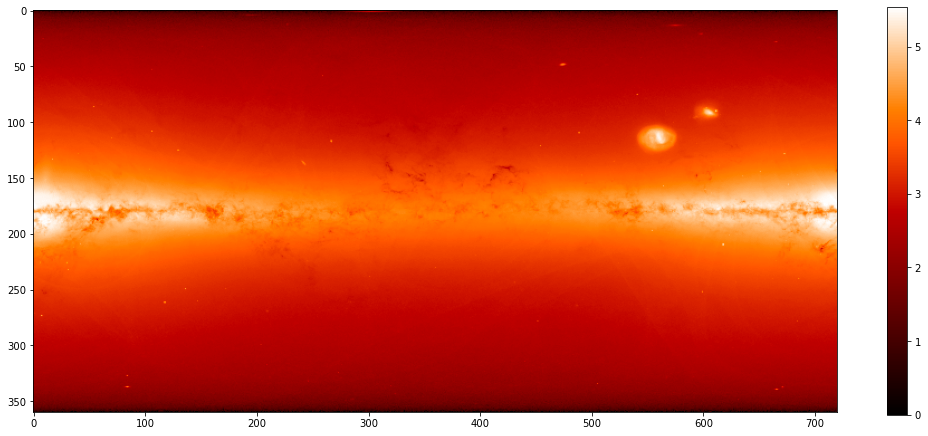

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,7.5))
plt.imshow(img.T, cmap='gist_heat')
plt.colorbar()
np.power(10, img).sum()

## API

In [ ]:
gaia = df.from_hips("s3://dirac/gaia")
sdss = df.from_hips("s3://dirac/sdss")

df = sdss.crossmatch(gaia, radius=1*u.as).select_circle(skypoint, radius=2u)
df.compute()

## More tests

In [98]:
pdf = pd.DataFrame(dict(key=np.arange(100, dtype=int), value=np.arange(100)/10))
df = dd.from_pandas(pdf, npartitions=5).set_index('key', sorted=True)

pdf2 = pd.DataFrame(dict(key=np.arange(100, dtype=int), value=np.arange(100)/10))
df2 = dd.from_pandas(pdf2, npartitions=5).set_index('key', sorted=True)

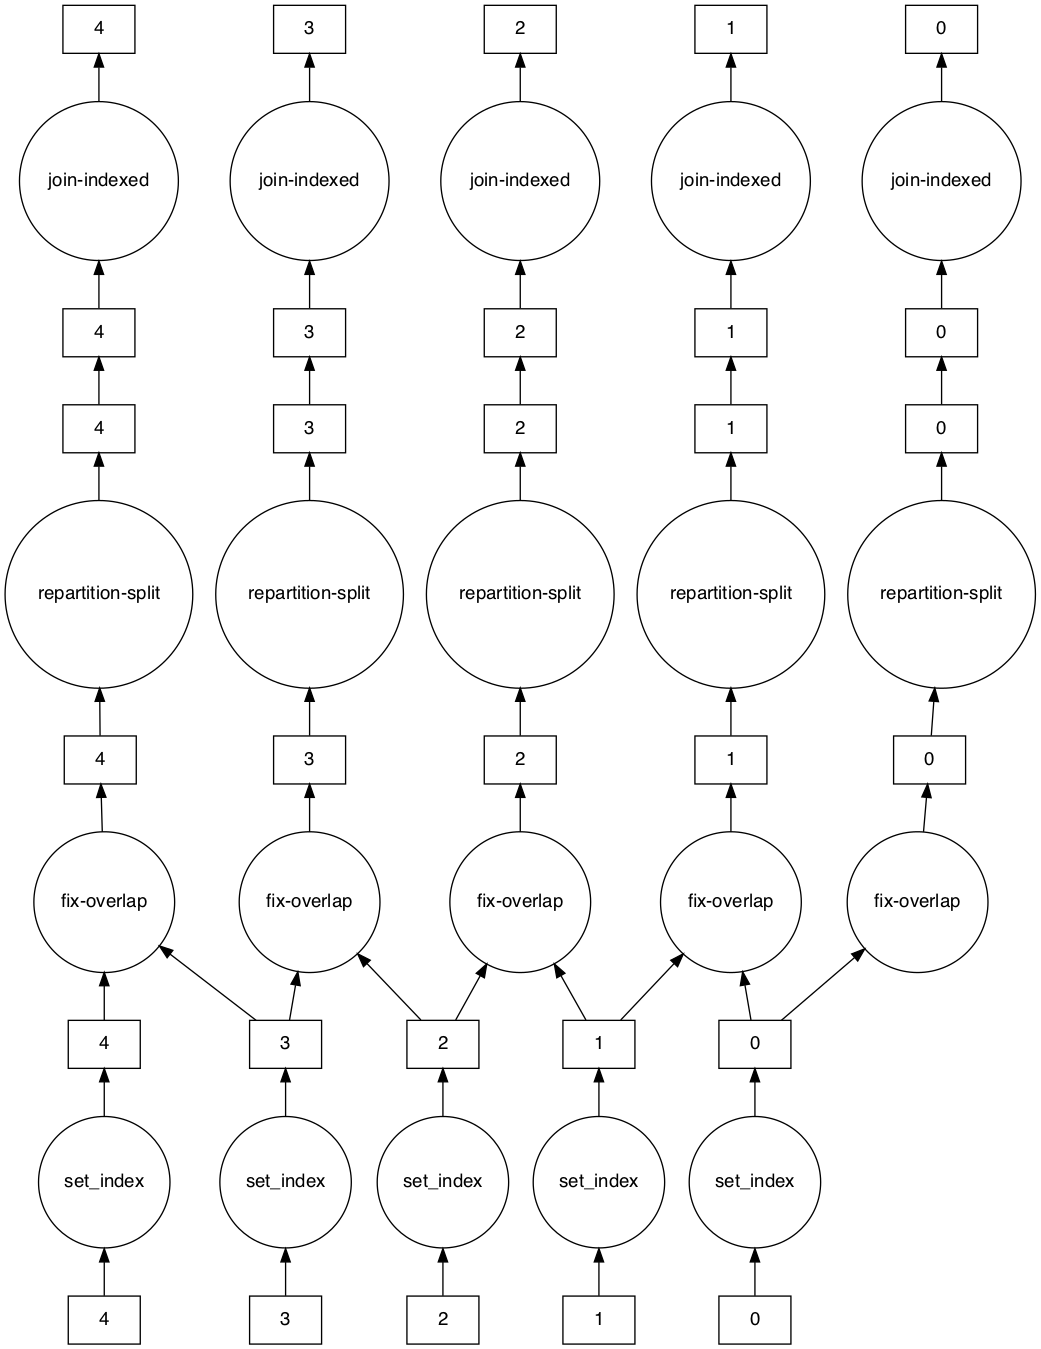

In [99]:
df.merge(df2, left_index=True, right_index=True).visualize()

In [4]:
import vaex
import pandas as pd
ff = ['output//Norder5/Npix652/catalog.h5', 'output//Norder5/Npix2201/catalog.h5', 'output//Norder5/Npix3920/catalog.h5']
ff2 = []
for fn in ff:
    df = vaex.open(fn)
    df = df.to_pandas_df()
    destFn='-'.join(fn.split('/')[-2:])
    print(fn, destFn)
    ff2.append(destFn)
    df = df.set_index('hips_pix').sort_index()
    df.to_hdf(destFn, key='catalog', format='table', complib='blosc:lz4', complevel=9)

output//Norder5/Npix652/catalog.h5 Npix652-catalog.h5
output//Norder5/Npix2201/catalog.h5 Npix2201-catalog.h5
output//Norder5/Npix3920/catalog.h5 Npix3920-catalog.h5


In [5]:
df = dd.read_hdf(ff2, key='catalog', sorted_index=True)
df

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,hips_k
npartitions=3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
652,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,bool,float64,float64,float64,float64,int64,int64,float64,int64,int64,bool,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
2201,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [6]:
! cp *.h5 cat2/
cat2ff = [ f'cat2/{fn}' for fn in ff2 ]
df2 = dd.read_hdf(ff2, key='catalog', sorted_index=True)
df2

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,hips_k
npartitions=3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
652,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,bool,float64,float64,float64,float64,int64,int64,float64,int64,int64,bool,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
2201,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


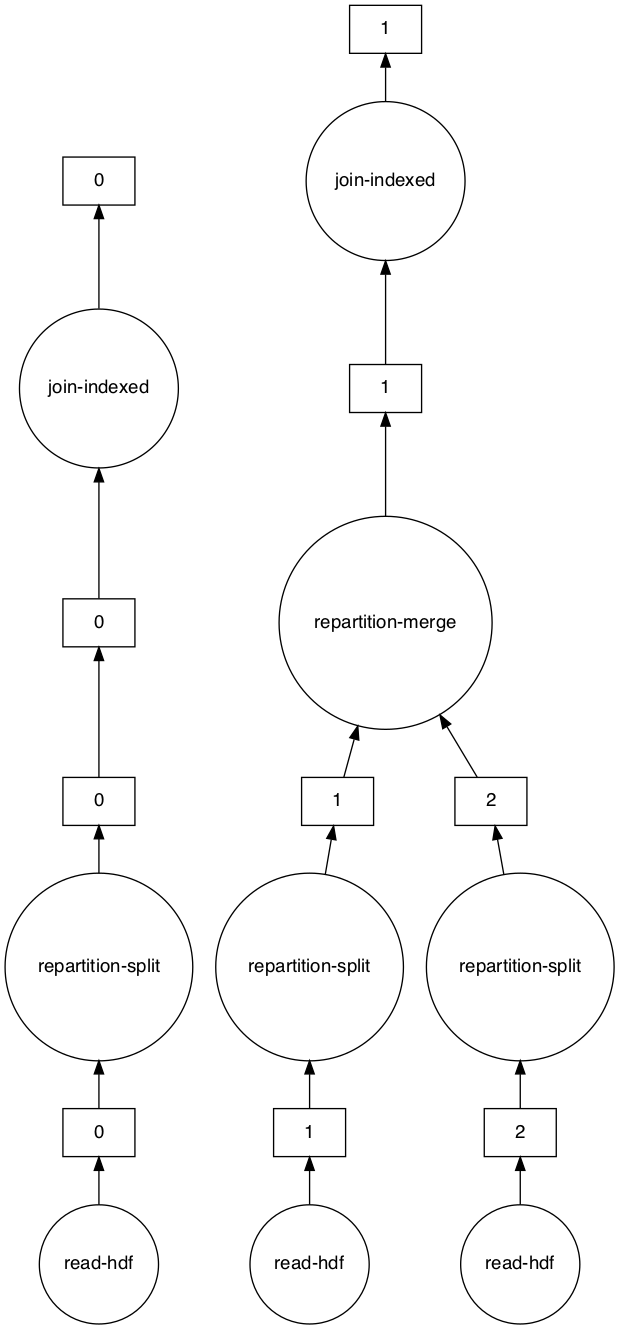

In [8]:
df.merge(df2, left_index=True, right_index=True).visualize()

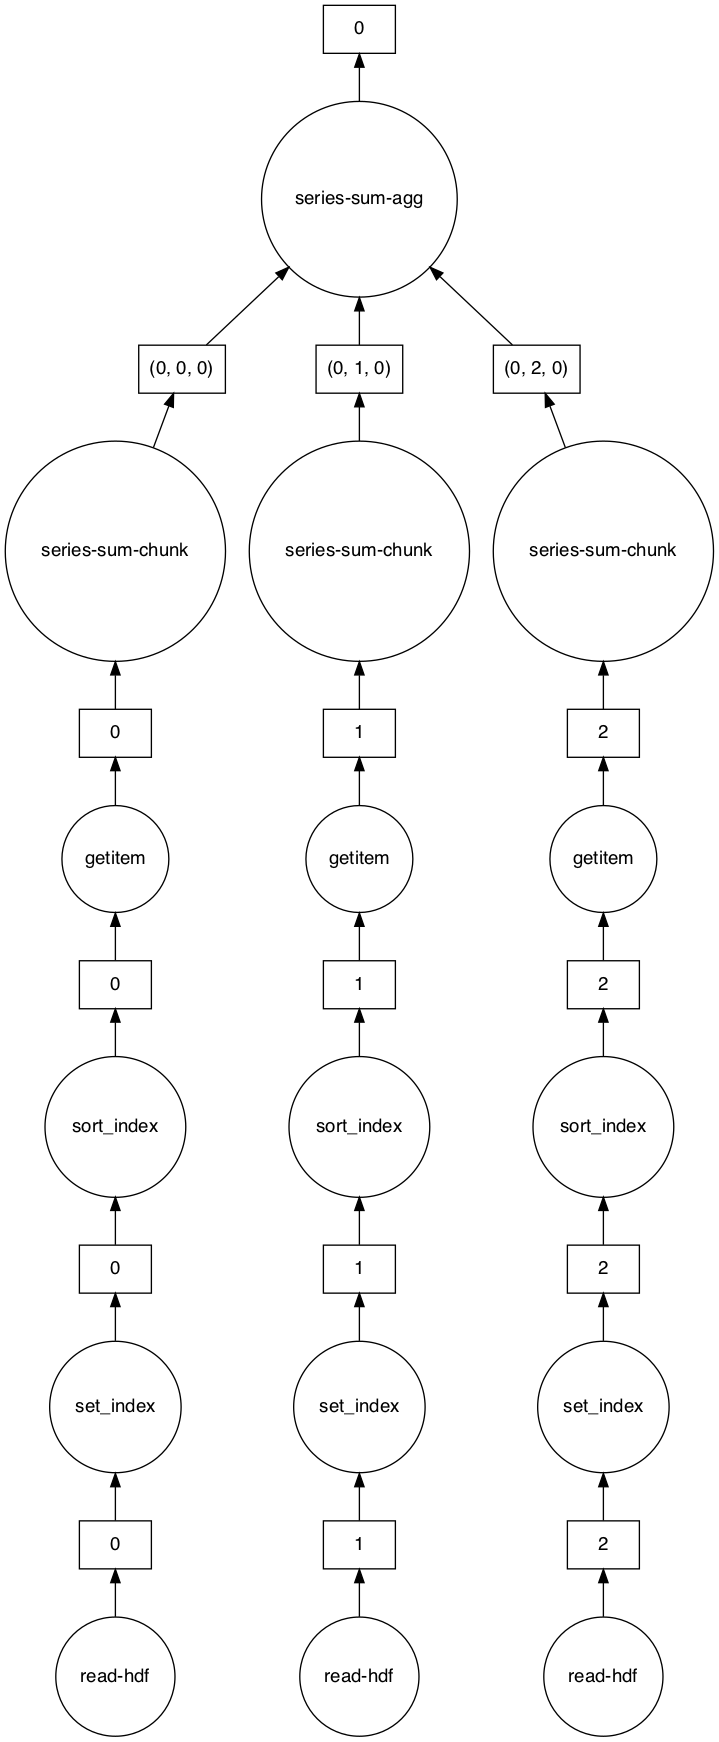

In [56]:
df['ra'].sum().visualize()